<a href="https://colab.research.google.com/github/wileyloyd/wileyloyd.github.io/blob/main/Medication_Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotnine as p9
from itertools import permutations
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend.preprocessing import TransactionEncoder
import networkx as nx


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


# Loading and Transforming the Medications Dataset

In [15]:
medications = pd.read_csv('/content/drive/MyDrive/OneDrive-Personal/wgu/D212 - Data Mining II/medical_market_basket.csv', header=None)
medications = medications.drop(0)
medications = medications.dropna(how='all')

# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


In [16]:
medications = medications.reset_index(drop=True)
medications.head(10)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,amlodipine,albuterol aerosol,allopurinol,pantoprazole,lorazepam,omeprazole,mometasone,fluconozole,gabapentin,pravastatin,cialis,losartan,metoprolol succinate XL,sulfamethoxazole,abilify,spironolactone,albuterol HFA,levofloxacin,promethazine,glipizide
1,citalopram,benicar,amphetamine salt combo xr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,enalapril,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,paroxetine,allopurinol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abilify,atorvastatin,folic acid,naproxen,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,cialis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,hydrochlorothiazide,glyburide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,metformin,salmeterol inhaler,sertraline HCI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,metoprolol,carvedilol,losartan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,glyburide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
medications.to_csv(r'/content/drive/MyDrive/OneDrive-Personal/wgu/D212 - Data Mining II/Task 3/medications_cleaned.csv', index=False, header=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


# Creating Baskets

In [18]:
# Create a list of baskets
baskets = []
basket = []
for index, row in medications.iterrows():
    if pd.isna(row[0]):
        if basket:
            baskets.append(basket)
            basket = []
    else:
        items = row.dropna().tolist()
        basket.append(items)

# Append the last basket if it's not empty
if basket:
    baskets.append(basket)

# Print the baskets
for basket in baskets:
    print(basket)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


[['amlodipine', 'albuterol aerosol', 'allopurinol', 'pantoprazole', 'lorazepam', 'omeprazole', 'mometasone', 'fluconozole', 'gabapentin', 'pravastatin', 'cialis', 'losartan', 'metoprolol succinate XL', 'sulfamethoxazole', 'abilify', 'spironolactone', 'albuterol HFA', 'levofloxacin', 'promethazine', 'glipizide'], ['citalopram', 'benicar', 'amphetamine salt combo xr'], ['enalapril'], ['paroxetine', 'allopurinol'], ['abilify', 'atorvastatin', 'folic acid', 'naproxen', 'losartan'], ['cialis'], ['hydrochlorothiazide', 'glyburide'], ['metformin', 'salmeterol inhaler', 'sertraline HCI'], ['metoprolol', 'carvedilol', 'losartan'], ['glyburide'], ['amphetamine salt combo xr', 'tramadol'], ['ezetimibe'], ['paroxetine', 'citalopram', 'abilify', 'amphetamine salt combo xr', 'fenofibrate'], ['carvedilol', 'Premarin', 'ezetimibe'], ['abilify', 'spironolactone'], ['abilify'], ['amlodipine', 'diazepam', 'clopidogrel', 'metoprolol succinate XL', 'triamterene', 'fenofibrate', 'cialis'], ['paroxetine', 'a

# Encoding the Baskets as Transactions

In [19]:
encoder = TransactionEncoder().fit(basket)

onehot = encoder.transform(basket)

onehot = pd.DataFrame(onehot, columns=encoder.columns_)

onehot.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Duloxetine,Premarin,Yaz,abilify,acetaminophen,actonel,albuterol HFA,albuterol aerosol,alendronate,allopurinol,alprazolam,amitriptyline,amlodipine,amoxicillin,amphetamine,amphetamine salt combo,amphetamine salt combo xr,atenolol,atorvastatin,azithromycin,benazepril,benicar,boniva,bupropion sr,carisoprodol,carvedilol,cefdinir,celebrex,celecoxib,cephalexin,cialis,ciprofloxacin,citalopram,clavulanate K+,clonazepam,clonidine HCI,clopidogrel,clotrimazole,codeine,crestor,cyclobenzaprine,cymbalta,dextroamphetamine XR,diazepam,diclofenac sodium,doxycycline hyclate,enalapril,escitalopram,esomeprazole,ezetimibe,fenofibrate,fexofenadine,finasteride,flovent hfa 110mcg inhaler,fluconozole,fluoxetine HCI,fluticasone,fluticasone nasal spray,folic acid,furosemide,gabapentin,glimepiride,glipizide,glyburide,hydrochlorothiazide,hydrocodone,hydrocortisone 2.5% cream,ibuprophen,isosorbide mononitrate,lansoprazole,lantus,levofloxacin,levothyroxine sodium,lisinopril,lorazepam,losartan,lovastatin,meloxicam,metformin,metformin HCI,methylprednisone,metoprolol,metoprolol succinate XL,metoprolol tartrate,mometasone,naproxen,omeprazole,oxycodone,pantoprazole,paroxetine,pioglitazone,potassium Chloride,pravastatin,prednisone,pregabalin,promethazine,quetiapine,ranitidine,rosuvastatin,salmeterol inhaler,sertraline HCI,simvastatin,spironolactone,sulfamethoxazole,synthroid,tamsulosin,temezepam,topiramate,tramadol,trazodone HCI,triamcinolone Ace topical,triamterene,trimethoprim DS,valaciclovir,valsartan,venlafaxine XR,verapamil SR,viagra,zolpidem
0,False,False,False,True,False,False,True,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,False,True,True,False,False,False,False,False,False,True,False,True,False,True,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fa

# Generating the Association Rules Using the Apriori Algorithm

In [20]:
frequent_itemsets = apriori(onehot, min_support=0.01,use_colnames=True)#.sort_values(by='support' ,ascending=False)
frequent_itemsets

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,support,itemsets
0,0.011998,(Duloxetine)
1,0.046794,(Premarin)
2,0.238368,(abilify)
3,0.015731,(acetaminophen)
4,0.011998,(actonel)
5,0.020397,(albuterol aerosol)
6,0.033329,(allopurinol)
7,0.079323,(alprazolam)
8,0.071457,(amlodipine)
9,0.030129,(amphetamine)


# Creating Association Rules

In [21]:
rules = association_rules(frequent_itemsets, metric = 'lift', min_threshold=1)
rules

#rules.to_csv(r'/Users/wileyloyd/Library/CloudStorage/OneDrive-Personal/wgu/D212 - Data Mining II/Task 3/rules.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Premarin),(diazepam),0.046794,0.163845,0.011598,0.247863,1.512793,0.003932,1.111706,0.355611
1,(diazepam),(Premarin),0.163845,0.046794,0.011598,0.070789,1.512793,0.003932,1.025824,0.405392
2,(abilify),(allopurinol),0.238368,0.033329,0.011598,0.048658,1.459926,0.003654,1.016113,0.413630
3,(allopurinol),(abilify),0.033329,0.238368,0.011598,0.348000,1.459926,0.003654,1.168147,0.325896
4,(amlodipine),(abilify),0.071457,0.238368,0.023597,0.330224,1.385352,0.006564,1.137144,0.299568
5,(abilify),(amlodipine),0.238368,0.071457,0.023597,0.098993,1.385352,0.006564,1.030562,0.365218
6,(abilify),(amphetamine salt combo),0.238368,0.068391,0.024397,0.102349,1.496530,0.008095,1.037830,0.435627
7,(amphetamine salt combo),(abilify),0.068391,0.238368,0.024397,0.356725,1.496530,0.008095,1.183991,0.356144
8,(abilify),(amphetamine salt combo xr),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562
9,(amphetamine salt combo xr),(abilify),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648


# Visualizing the Rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<Axes: xlabel='antecedents', ylabel='consequents'>

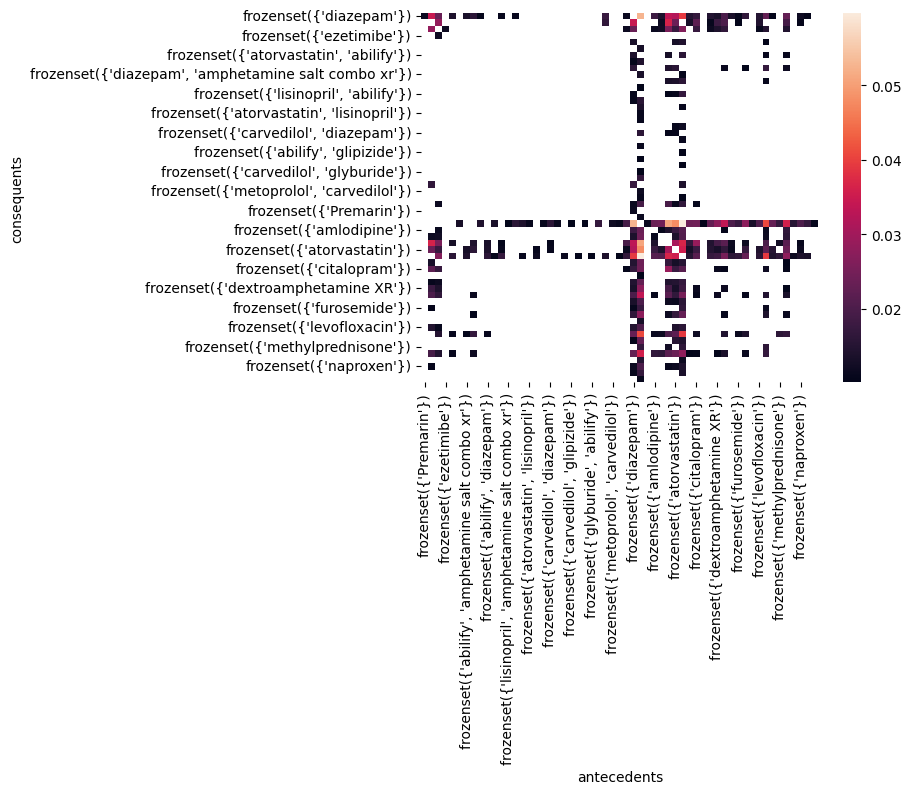

In [22]:
support_table = rules.pivot(index='consequents', columns='antecedents', values='support')
sns.heatmap(support_table)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<Axes: xlabel='antecedent support', ylabel='consequent support'>

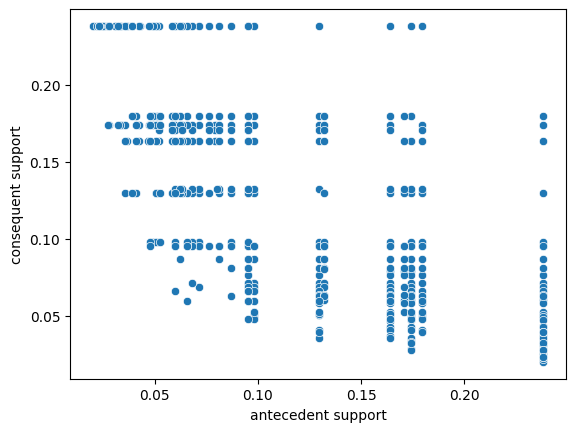

In [23]:
sns.scatterplot(x='antecedent support', y='consequent support', data=rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


<Axes: xlabel='antecedent support', ylabel='consequent support'>

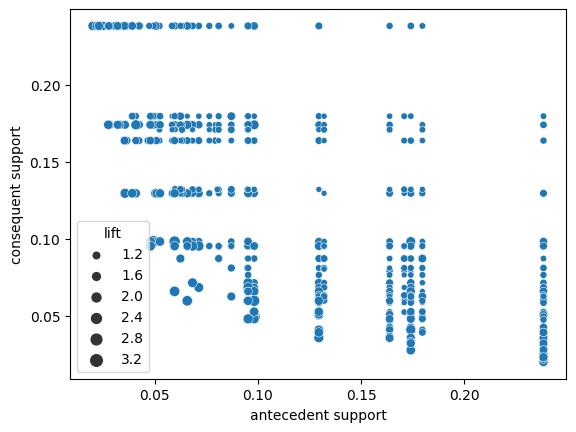

In [24]:
sns.scatterplot(x='antecedent support', y='consequent support', size='lift', data=rules)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


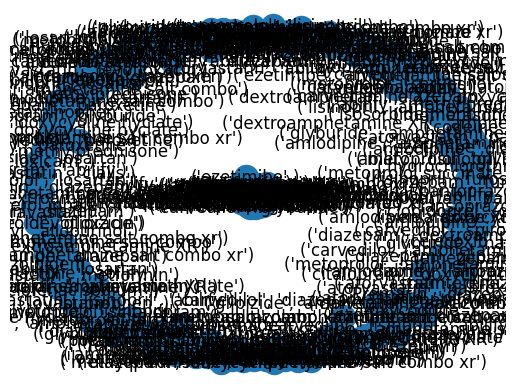

In [25]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes to the graph
for item in frequent_itemsets['itemsets']:
    G.add_node(tuple(item))

# Add edges and labels to the graph
for _, row in rules.iterrows():
    G.add_edge(tuple(row['antecedents']), tuple(row['consequents']), weight=row['lift'])
    G.edges[tuple(row['antecedents']), tuple(row['consequents'])]['label'] = round(row['lift'], 2)

# Set layout for the graph
pos = nx.spring_layout(G, seed=42)

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Add edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels)

# Display the graph
plt.axis('off')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
